In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
df = pd.read_csv('pupil_positions.csv')

In [47]:
# zrób diameter
df.loc[:, 'diam'] = df['diameter']

# zrób na ze wszystkich, które mają confi < 0.9
df.loc[df['confidence'] < .95, 'diam'] = np.nan

#przelicz z-score
# df.loc[:, 'diam'] = stats.zscore(df['diam'])

# dołóż dobry czas
start_time = df['pupil_timestamp'][0]
df['time'] = df['pupil_timestamp'] - start_time

# określ warunki
df['condition'] = 'recovery'
df.loc[df['time'] < 60, 'condition'] = 'test'
df.loc[df['time'] < 30, 'condition'] = 'baseline'

# rozbij na oczy
e0 = df.loc[df['eye_id'] == 0, :]
e1 = df.loc[df['eye_id'] == 1, :]

In [37]:
e0.diam

1        51.565845
3        51.370087
5        51.721242
7        51.836110
9        51.915821
           ...    
36470    50.503719
36472    50.349985
36474          NaN
36476          NaN
36478    50.691213
Name: diam, Length: 18245, dtype: float64

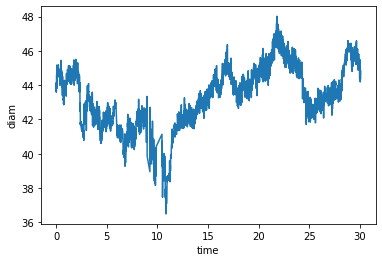

In [42]:
sns.lineplot(x='time', y='diam', data=e1[:200*30])
plt.savefig('plt.png', dpi=300)

# Tu może być fft

In [48]:
def make_fft(signal):
    n_samples = len(signal)
    fft_freq = np.fft.fftfreq(n_samples, sample_spacing)
    fft_vals = np.fft.fft(signal)
    fft_df = pd.DataFrame({'freq':fft_freq, 'val':abs(fft_vals)})
    return fft_df[(fft_df['freq']>0)]

In [49]:
# lepsze jest oko 1, więc tylko to weźmiemy
# najpierw baseline
baseline = df[(df['condition'] == 'baseline') & (df['eye_id']==1)]

czas_przes = baseline['time'].values[1:]
time_diff = baseline['time'][:-1] - czas_przes
sample_spacing = time_diff.mean()

signal = baseline['diameter']
fft_baseline = make_fft(signal)
fft_baseline['cond'] = 'baseline'

signal = df.loc[(df['condition'] == 'test') & (df['eye_id']==1), 'diameter']
fft_test = make_fft(signal)
fft_test['cond'] = 'test'

signal = df.loc[(df['condition'] == 'recovery') & (df['eye_id']==1), 'diameter']
fft_recovery = make_fft(signal)
fft_recovery['cond'] = 'recovery'

fft_all = pd.concat([fft_baseline, fft_test, fft_recovery])


In [50]:
sns.lineplot('freq', 'val', data=fft_df[(fft_df['freq']>0.05)&(fft_df['freq']<20)])

NameError: name 'fft_df' is not defined

# Zywert


In [51]:
df = pd.read_csv('zywert.csv')

In [52]:
# zrób diameter
df.loc[:, 'diam'] = df['diameter']

# zrób na ze wszystkich, które mają confi < 0.9
df.loc[df['confidence'] < .95, 'diam'] = np.nan

#przelicz z-score
# df.loc[:, 'diam'] = stats.zscore(df['diam'])

# dołóż dobry czas
start_time = df['pupil_timestamp'][0]
df['time'] = df['pupil_timestamp'] - start_time

# określ warunki
df['condition'] = 'recovery'
df.loc[df['time'] < 60, 'condition'] = 'test'
df.loc[df['time'] < 30, 'condition'] = 'baseline'

# rozbij na oczy
e0 = df.loc[df['eye_id'] == 0, :]
e1 = df.loc[df['eye_id'] == 1, :]

In [53]:
e0.diam

3        48.444207
5        48.162658
7        48.177539
9        48.131279
11       48.312121
           ...    
35917    45.556308
35919    45.144620
35921    45.771925
35923    45.705337
35925    45.551592
Name: diam, Length: 18049, dtype: float64

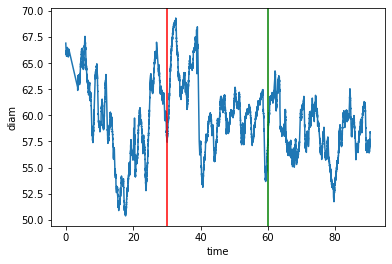

In [59]:
sns.lineplot(x='time', y='diam', data=e1)
plt.axvline(30, c='red')
plt.axvline(60, c='green')
plt.savefig('zywert1.png', dpi=300)

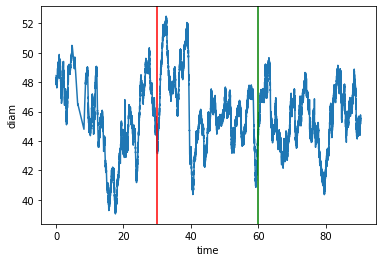

In [60]:
sns.lineplot(x='time', y='diam', data=e0)
plt.axvline(30, c='red')
plt.axvline(60, c='green')
plt.savefig('zywert2.png', dpi=300)

# Maria


In [61]:
df = pd.read_csv('maria.csv')

In [62]:
# zrób diameter
df.loc[:, 'diam'] = df['diameter']

# zrób na ze wszystkich, które mają confi < 0.9
df.loc[df['confidence'] < .95, 'diam'] = np.nan

#przelicz z-score
# df.loc[:, 'diam'] = stats.zscore(df['diam'])

# dołóż dobry czas
start_time = df['pupil_timestamp'][0]
df['time'] = df['pupil_timestamp'] - start_time

# określ warunki
df['condition'] = 'recovery'
df.loc[df['time'] < 60, 'condition'] = 'test'
df.loc[df['time'] < 30, 'condition'] = 'baseline'

# rozbij na oczy
e0 = df.loc[df['eye_id'] == 0, :]
e1 = df.loc[df['eye_id'] == 1, :]

In [63]:
e0.diam

2        53.835382
4        53.332880
6        53.267104
8        53.372387
10       53.540490
           ...    
24279    52.305531
24281    52.322290
24283    52.842652
24285    52.660786
24287    52.518354
Name: diam, Length: 12133, dtype: float64

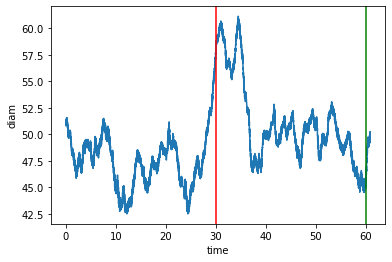

In [66]:
sns.lineplot(x='time', y='diam', data=e1)
plt.axvline(30, c='red')
plt.axvline(60, c='green')
plt.savefig('maria1.png', dpi=300)

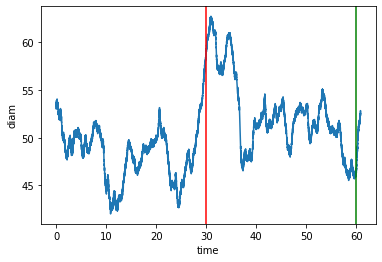

In [65]:
sns.lineplot(x='time', y='diam', data=e0)
plt.axvline(30, c='red')
plt.axvline(60, c='green')
plt.savefig('maria2.png', dpi=300)